In [2]:
import numpy as np
import os
from tsnecuda import TSNE
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# path to embeddings
embeddings_fn = os.path.join("outputs", "eng_val.npz")


embeddings_npz = np.load(embeddings_fn)
keys = [x for x in embeddings_npz]
labels = [x.split("_")[0] for x in embeddings_npz]
labels_np = np.array(labels)
embeddings = [embeddings_npz[x] for x in embeddings_npz]
embeddings_np = np.array(embeddings)
print(embeddings_np.shape)

(4686, 130)


In [8]:
np.random.seed(0)

most_common_labels = np.array([x[0] for x in Counter(labels).most_common(50)])
# print(most_common_labels)
rand_idxs = np.random.randint(0, high=50, size=10, dtype=int)
# print(rand_idxs)

In [9]:
labels_selected = most_common_labels[rand_idxs]
# print(labels_selected)

keys_plot = []
for key in keys:
    if key.split("_")[0] in labels_selected:
        keys_plot.append(key)
        
embeddings_plot_np = np.array([embeddings_npz[key] for key in keys_plot])
# print(embeddings_plot_np.shape)

labels_plot_np = np.array([key.split("_")[0] for key in keys_plot])
# print(labels_plot_np)

In [10]:
X = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(embeddings_plot_np)
print(X.shape)

WARNING clustering 202 points to 14 centroids: please provide at least 546 training points


(202, 2)


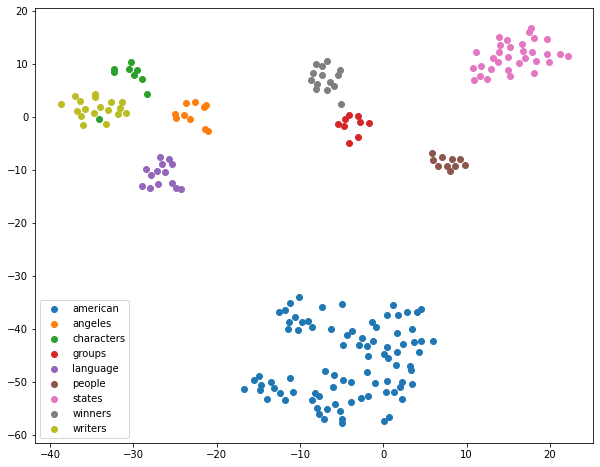

In [11]:
fig = plt.figure(figsize=(10,8))
cmap = plt.get_cmap("tab10")
# print(labels_plot_np)
for label in np.unique(labels_plot_np):
#     print(label)
    plt.scatter(X[labels_plot_np==label][:,0], X[labels_plot_np==label][:,1], cmap=cmap, label=label)
    
    
plt.legend()
plt.show()